In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np
from tqdm import trange  # Import trange for progress bar during training
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling



In [ ]:
!wget https://github.com/guyuxuan9/MML_coursework/raw/refs/heads/main/Datasets/kryptonite-18-X.npy -O kryptonite-18-X.npy
!wget https://github.com/guyuxuan9/MML_coursework/raw/refs/heads/main/Datasets/kryptonite-18-y.npy -O kryptonite-18-y.npy
!wget https://github.com/guyuxuan9/MML_coursework/raw/refs/heads/main/Datasets/hidden-kryptonite-18-X.npy -O hidden-kryptonite-18-X.npy
X = np.load('kryptonite-18-X.npy')
y = np.load('kryptonite-18-y.npy')

Using device: cuda


  2%|▏         | 1/50 [00:05<04:52,  5.96s/it]

New best model saved with test loss: 0.6932
Epoch [1/50], Train Loss: 0.6936, Train Accuracy: 49.82%, Test Loss: 0.6932, Test Accuracy: 49.85%


  4%|▍         | 2/50 [00:08<03:12,  4.01s/it]

New best model saved with test loss: 0.6931


 22%|██▏       | 11/50 [00:38<01:57,  3.02s/it]

Epoch [11/50], Train Loss: 0.6932, Train Accuracy: 49.56%, Test Loss: 0.6931, Test Accuracy: 50.17%


 24%|██▍       | 12/50 [00:40<01:52,  2.97s/it]

New best model saved with test loss: 0.6931


 26%|██▌       | 13/50 [00:44<01:51,  3.02s/it]

New best model saved with test loss: 0.6931


 42%|████▏     | 21/50 [01:05<01:19,  2.73s/it]

Epoch [21/50], Train Loss: 0.6909, Train Accuracy: 52.95%, Test Loss: 0.6940, Test Accuracy: 50.58%


 52%|█████▏    | 26/50 [01:19<01:08,  2.86s/it]

New best model saved with test loss: 0.5272


 54%|█████▍    | 27/50 [01:22<01:04,  2.79s/it]

New best model saved with test loss: 0.3743


 56%|█████▌    | 28/50 [01:25<01:00,  2.75s/it]

New best model saved with test loss: 0.3392


 58%|█████▊    | 29/50 [01:27<00:57,  2.72s/it]

New best model saved with test loss: 0.3338


 60%|██████    | 30/50 [01:30<00:54,  2.73s/it]

New best model saved with test loss: 0.3335


 62%|██████▏   | 31/50 [01:33<00:54,  2.89s/it]

New best model saved with test loss: 0.3244
Epoch [31/50], Train Loss: 0.3275, Train Accuracy: 87.44%, Test Loss: 0.3244, Test Accuracy: 88.29%


 72%|███████▏  | 36/50 [01:48<00:40,  2.91s/it]

New best model saved with test loss: 0.3223


 74%|███████▍  | 37/50 [01:50<00:37,  2.91s/it]

New best model saved with test loss: 0.3154


 78%|███████▊  | 39/50 [01:56<00:31,  2.87s/it]

New best model saved with test loss: 0.3084


 80%|████████  | 40/50 [01:59<00:28,  2.88s/it]

New best model saved with test loss: 0.3054


 82%|████████▏ | 41/50 [02:02<00:26,  2.90s/it]

New best model saved with test loss: 0.3048
Epoch [41/50], Train Loss: 0.2939, Train Accuracy: 89.06%, Test Loss: 0.3048, Test Accuracy: 88.86%


 84%|████████▍ | 42/50 [02:05<00:22,  2.84s/it]

New best model saved with test loss: 0.3000


 96%|█████████▌| 48/50 [02:24<00:06,  3.22s/it]

New best model saved with test loss: 0.2918


100%|██████████| 50/50 [02:30<00:00,  3.02s/it]


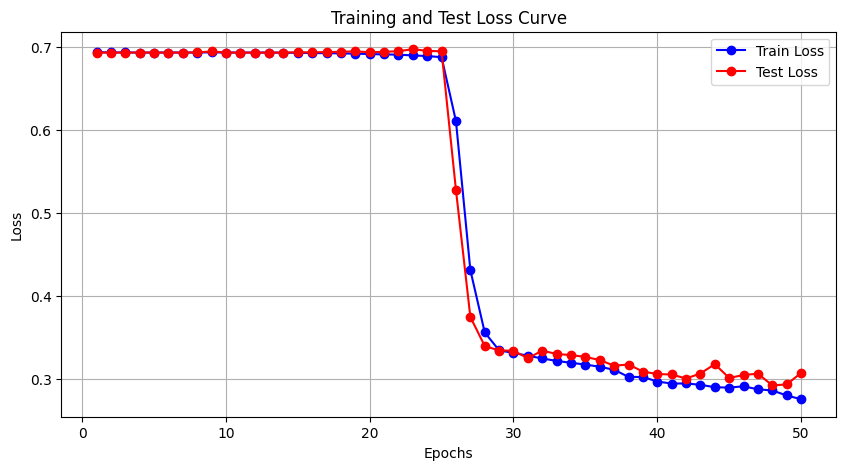

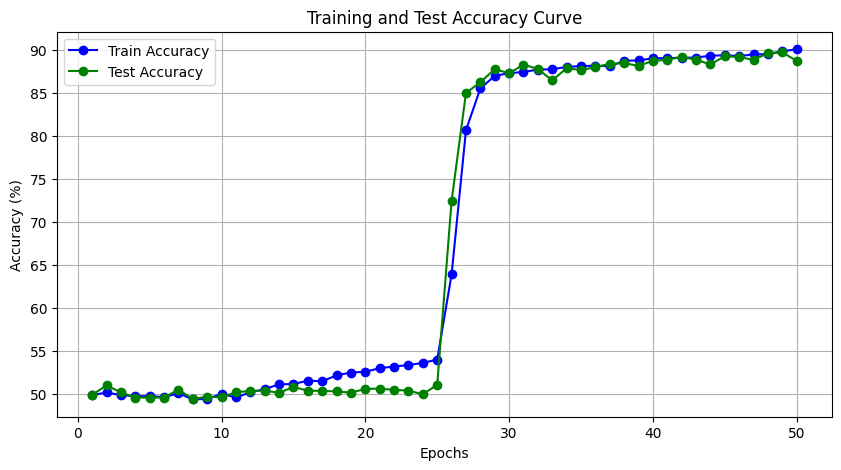

<ipython-input-18-561622aea4d8>:179: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(best_model_path))


Final Test Accuracy: 89.62%
Confusion Matrix:
[[3215  352]
 [ 395 3238]]


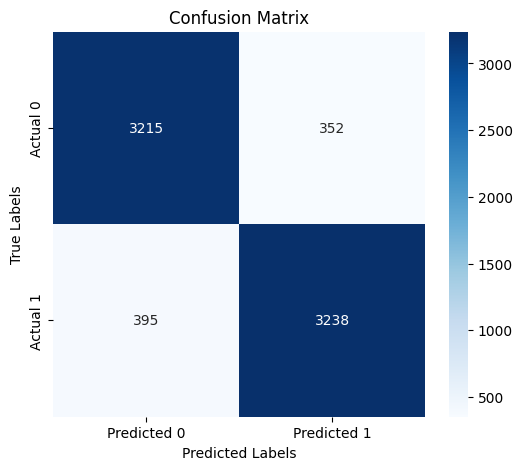

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8906    0.9013    0.8959      3567
         1.0     0.9019    0.8913    0.8966      3633

    accuracy                         0.8962      7200
   macro avg     0.8963    0.8963    0.8962      7200
weighted avg     0.8963    0.8962    0.8963      7200



In [18]:
# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the Neural Network model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()

        self.fc1 = nn.Linear(19, 256)
        self.bn1 = nn.LayerNorm(256)  # Add Batch Normalization
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.LayerNorm(256)   # Add Batch Normalization
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1)    # Hidden layer (64 neurons) -> Output layer (1 neuron)


        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.nn.functional.gelu(self.bn1(self.fc1(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.bn2(self.fc2(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc3(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc4(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc5(x))  # Apply batch normalization before activation
        x = self.fc6(x)               # Output layer (logits)
        x = self.sigmoid(x)           # Sigmoid activation to get a value between 0 and 1 (binary classification)
        return x

# Create the model instance and move it to the GPU
model = BinaryClassifier().to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)


# Split the dataset into training and test sets
norms = np.linalg.norm(X, axis=1).reshape(-1, 1)  # Norms as feature
X_train, X_test, y_train, y_test = train_test_split(np.concatenate([X, norms], axis=1), y, test_size=0.2, random_state=42)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()  # Or you can use MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert them into PyTorch tensors (ensure float32 for targets) and move to GPU
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)  # Ensure float32 type for BCE loss

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Create DataLoader for training and test datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Store loss values for plotting
train_losses = []
test_losses = []

# Store accuracy values for plotting
train_accuracies = []
test_accuracies = []

# Initialize a variable to track the best test loss
best_test_loss = float('inf')  # Start with a very high value
best_model_path = 'best_model_n18.pt'  # Path to save the best model

# Training Loop
epochs = 50
for epoch in trange(epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    all_preds_train = []  # List to store predictions for accuracy
    all_labels_train = []  # List to store true labels for accuracy

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track the loss for logging
        running_loss += loss.item()

        # Collect predictions and labels for accuracy calculation
        all_preds_train.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
        all_labels_train.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_train = np.concatenate(all_preds_train, axis=0)
    all_labels_train = np.concatenate(all_labels_train, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    train_accuracy = accuracy_score(all_labels_train, all_preds_train)
    train_accuracies.append(train_accuracy)  # Append training accuracy

    # Test loop
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    all_preds_test = []  # List to store predictions for accuracy
    all_labels_test = []  # List to store true labels for accuracy

    with torch.no_grad():  # No need to compute gradients for testing
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            # Collect predictions and labels for accuracy calculation
            all_preds_test.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
            all_labels_test.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_test = np.concatenate(all_preds_test, axis=0)
    all_labels_test = np.concatenate(all_labels_test, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    test_accuracies.append(test_accuracy)  # Append test accuracy

    # Store losses for plotting
    train_losses.append(running_loss / len(train_loader))  # Average loss for training set
    test_losses.append(test_loss / len(test_loader))  # Average loss for test set

    # Check if the current test loss is the best we've seen
    if test_loss / len(test_loader) < best_test_loss:
        best_test_loss = test_loss / len(test_loader)
        torch.save(model.state_dict(), best_model_path)  # Save the model parameters
        print(f"New best model saved with test loss: {best_test_loss:.4f}")

    if epoch % 10 == 0:
        # Print loss and accuracy for this epoch
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy*100:.2f}%, "
              f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

# Plotting the Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), [acc * 100 for acc in train_accuracies], label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1, epochs + 1), [acc * 100 for acc in test_accuracies], label='Test Accuracy', color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on the Test Set and Report Metrics
# Load the best model
best_model = BinaryClassifier().to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = best_model(inputs)
        preds = (outputs > 0.5).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(targets.cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Calculate final test accuracy
final_test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

# Generate Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:")
print(report)


In [20]:
# Load the hidden data
X_hidden = np.load('hidden-kryptonite-18-X.npy')

# Calculate norms for the hidden data
norms_hidden = np.linalg.norm(X_hidden, axis=1).reshape(-1, 1)

# Concatenate norms as a feature
X_hidden_with_norms = np.concatenate([X_hidden, norms_hidden], axis=1)

# Scale the hidden data using the same scaler used for training
X_hidden_scaled = scaler.transform(X_hidden_with_norms)

# Convert to PyTorch tensor and move to the device
X_hidden_tensor = torch.tensor(X_hidden_scaled, dtype=torch.float32).to(device)

# Load the best saved model
model = BinaryClassifier().to(device)  # Ensure model is re-initialized
model.load_state_dict(torch.load('best_model_n18.pt'))  # Load trained weights
model.eval()  # Set model to evaluation mode

# Make predictions
with torch.no_grad():
    hidden_predictions = model(X_hidden_tensor)

# Convert predictions to binary (0 or 1)
hidden_predictions_binary = (hidden_predictions > 0.5).cpu().numpy()

# Save the predictions
np.save('hidden-kryptonite-18-y.npy', hidden_predictions_binary)


<ipython-input-20-9f5cd751b460>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_n18.pt'))  # Load trained weights
